In [1]:
import time
import json
from kafka import KafkaConsumer
from pandas import DataFrame
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
brokers='localhost:9092'
topic='Goldrates'
sleep_time=300
offset='latest'

In [3]:
consumer = KafkaConsumer(bootstrap_servers=brokers, auto_offset_reset=offset,consumer_timeout_ms=1000)
consumer.subscribe([topic]) 

Latest Gold Price: 1952.053
Gold Price at: 2020-11-08 17:05:24.836000
-----------------------------------------


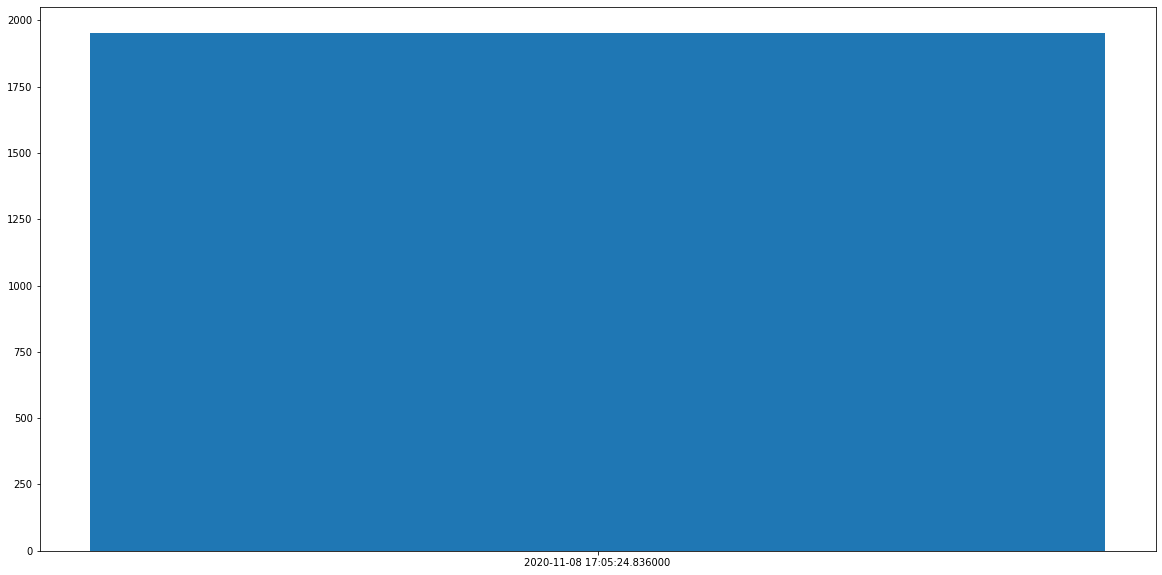

Latest Gold Price: 1952.053
Gold Price at: 2020-11-08 17:10:24.862000
-----------------------------------------


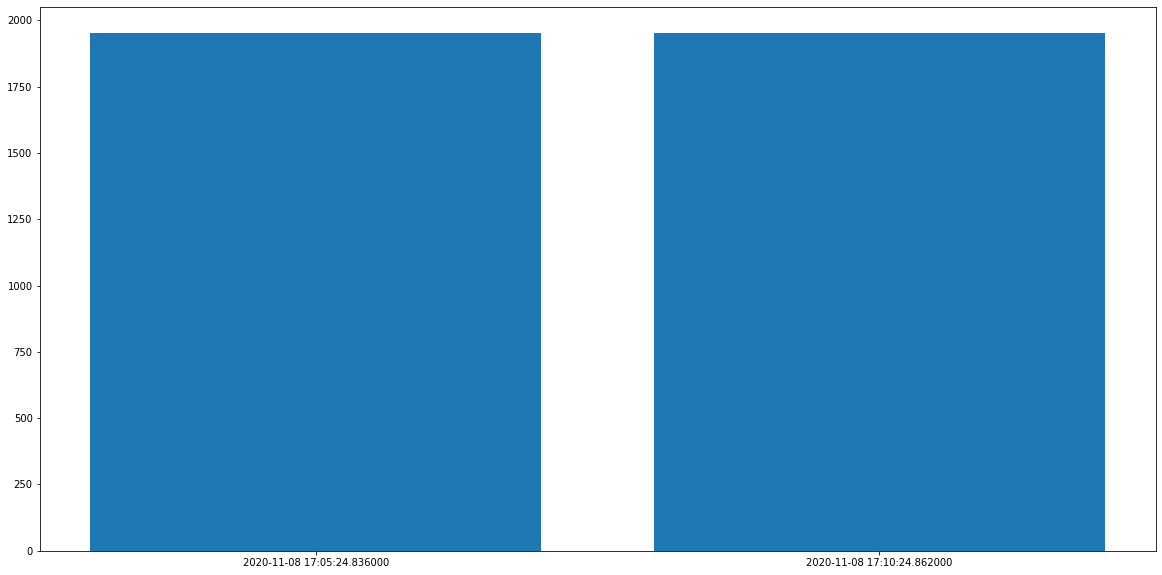

Latest Gold Price: 1952.053
Gold Price at: 2020-11-08 17:15:24.864000
-----------------------------------------


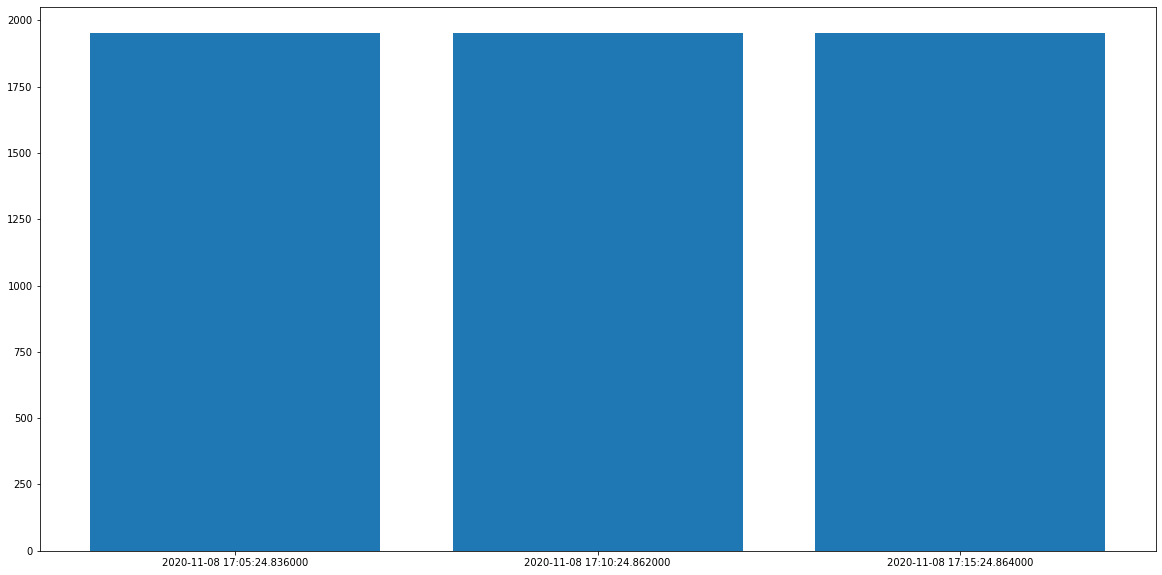

Latest Gold Price: 1952.053
Gold Price at: 2020-11-08 17:20:25.860000
-----------------------------------------


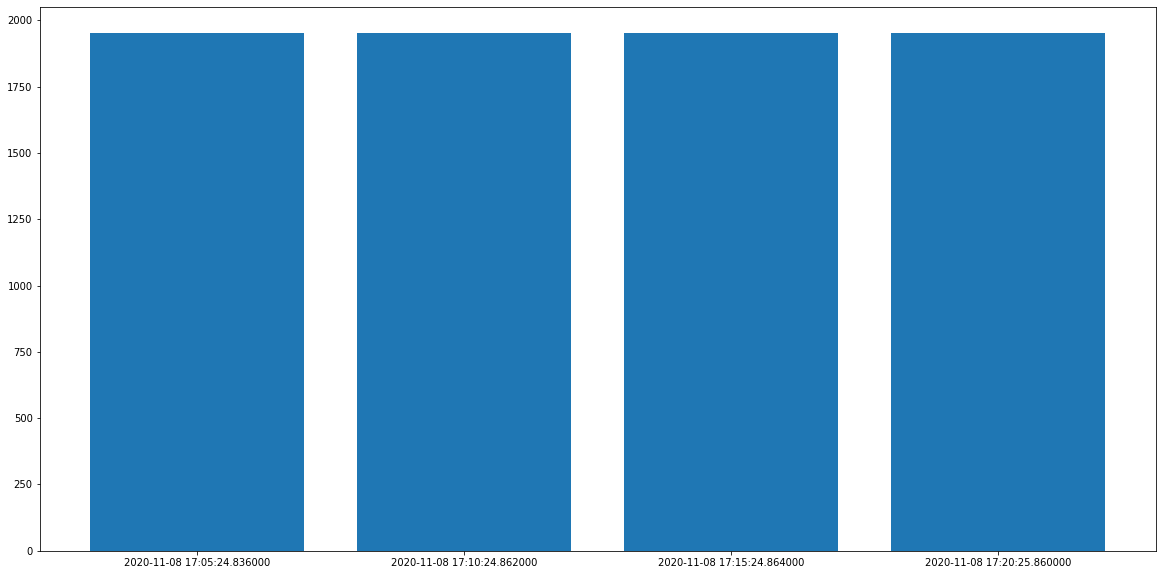

In [ ]:
prev_price=0
goldprice_dict = {}
while(True):
    for message in consumer:
        #print(message)
        d=json.loads(message.value)
        df=DataFrame(d)
        for x in range(1):
            #print(x)
            new_price=df['spreadProfilePrices'][x][0]
            ts=df['ts'][x]
            #print(new_price)
            print("Latest Gold Price: " + str(new_price['ask']))
            datetime_time = datetime.fromtimestamp(ts/1000)
            goldprice_dict[str(datetime_time)]=new_price['ask']
            print("Gold Price at: " + str(datetime_time))
        print("-----------------------------------------")
        #print(goldprice_dict)
        plt.figure(figsize=(20,10))
        plt.bar(range(len(goldprice_dict)), list(goldprice_dict.values()), align='center',linewidth=0.5)
        plt.xticks(range(len(goldprice_dict)), list(goldprice_dict.keys()))
        plt.show()
        
    time.sleep(sleep_time)